In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra

In [2]:
# Specify room size and transducer positions

room_size = [4,6]
src_pos = [2.5, 4.5]
mic_pos = [2, 1.5]

In [3]:
# Create a 4 by 6 metres shoe box room

room1 = pra.Room.shoeBox2D([0,0], [4,6])

In [4]:
# Add a source somewhere in the room

room1.addSource([2.5, 4.5])

In [5]:
# Create a linear array beamformer with 4 microphones
# with angle 0 degrees and inter mic distance 10 cm

R = pra.linear2DArray(mic_pos, 4, 0, 0.04)
room1.addMicrophoneArray(pra.Beamformer(R, room1.fs))

In [6]:
# Now compute the delay and sum weights for the beamformer

room1.micArray.farFieldWeights(np.arctan2(src_pos[0]-mic_pos[0], src_pos[1]-mic_pos[1]))
room1.micArray.rakeDelayAndSumWeights(room1.sources[0][:1])

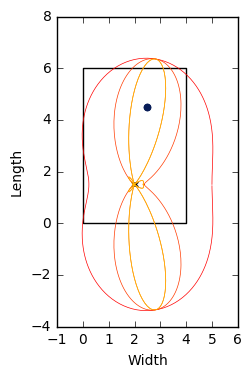

In [9]:
# plot the room and resulting beamformer

fig = plt.figure()
room1.plot(freq=[1000, 2000, 4000, 8000], img_order=0)
plt.xlabel('Width', fontsize=10)
plt.ylabel('Length', fontsize=10)
plt.show()
